In [265]:
#Importing the required libraries

import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from PIL import Image # converting images into arrays

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

from wordcloud import WordCloud, STOPWORDS


Libraries imported.


In [287]:
address = 'Tempe, Arizona'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Tempe, Arizona are {}, {}.'.format(latitude, longitude))

/home/prakash/PREFIX=/home/codebind/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Tempe, Arizona are 33.4255056, -111.9400125.


In [3]:
!wget "https://www.downloadexcelfiles.com/sites/default/files/docs/list-cities-arizona-state-us-166j.csv" 

--2020-06-14 17:36:32--  https://www.downloadexcelfiles.com/sites/default/files/docs/list-cities-arizona-state-us-166j.csv
Resolving www.downloadexcelfiles.com (www.downloadexcelfiles.com)... 172.104.160.11, 2400:8901::f03c:91ff:feb3:9443
Connecting to www.downloadexcelfiles.com (www.downloadexcelfiles.com)|172.104.160.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6492 (6.3K) [text/csv]
Saving to: ‘list-cities-arizona-state-us-166j.csv.1’

list-cities-arizona 100%[===================>]   6.34K  --.-KB/s    in 0s      

2020-06-14 17:36:33 (121 MB/s) - ‘list-cities-arizona-state-us-166j.csv.1’ saved [6492/6492]



In [6]:
arizona_data = pd.read_csv('list-cities-arizona-state-us-166j.csv', encoding = 'latin1')

In [7]:
arizona_data = arizona_data.drop(['Incorporated', 'Type'], axis=1)
arizona_data = arizona_data.rename({"Name": "Neighborhood", "County" : "Borough"}, axis=1)
arizona_data

Neighborhood     Borough Population  \
0                                                 NaN         NaN      -2010   
1                                     Apache Junction       Pinal     35,840   
2                                            Avondale    Maricopa     76,238   
3                                              Benson     Cochise      5,105   
4                                              Bisbee     Cochise      5,575   
5                                             Buckeye    Maricopa      8,173   
6                                       Bullhead City      Mohave     39,540   
7                                          Camp Verde     Yavapai     10,873   
8                                            Carefree    Maricopa      3,363   
9                                         Casa Grande       Pinal     48,571   
10                                         Cave Creek    Maricopa      5,015   
11                                           Chandler    Maricopa   2,36,123   
12                                       Chino Valley     Yavapai     10,817   
13                                          Clarkdale     Yavapai      4,097   
14                                            Clifton    Greenlee      3,311   
15                                      Colorado City      Mohave      4,821   
16                                           Coolidge       Pinal     11,825   
17                                         Cottonwood     Yavapai     11,265   
18                                     Dewey-Humboldt     Yavapai      3,894   
19                                            Douglas     Cochise     17,378   
20                                             Duncan    Greenlee        696   
21                                              Eagar      Apache      4,885   
22                                          El Mirage    Maricopa     31,797   
23                                               Eloy       Pinal     16,631   
24                                          Flagstaff    Coconino     65,870   
25                                           Florence       Pinal     25,536   
26                                     Fountain Hills    Maricopa     22,489   
27                                           Fredonia    Coconino      1,314   
28                                          Gila Bend    Maricopa      1,922   
29                                            Gilbert    Maricopa   2,08,453   
30                                           Glendale    Maricopa   2,26,721   
31                                              Globe        Gila      7,532   
32                                           Goodyear    Maricopa     65,275   
33                                          Guadalupe    Maricopa      5,523   
34                                             Hayden        Gila        662   
35                                           Holbrook      Navajo      5,053   
36                                      Huachuca City     Cochise      1,853   
37                                             Jerome     Yavapai        444   
38                                             Kearny       Pinal      1,950   
39                                            Kingman      Mohave     28,068   
40                                   Lake Havasu City      Mohave     52,527   
41                                    Litchfield Park    Maricopa      5,476   
42                                            Mammoth       Pinal      1,426   
43                                             Marana        Pima     34,961   
44                                           Maricopa       Pinal     43,482   
45                                               Mesa    Maricopa   4,39,041   
46                                              Miami        Gila      1,837   
47                                            Nogales  Santa Cruz     20,837   
48                                         Oro Valley        Pima     41,011   
49                                       

In [8]:
arizona_data.columns

Index(['Neighborhood', 'Borough', 'Population', 'Area (2010)',
       'Density (2010)'],
      dtype='object')

In [10]:
ar = pd.DataFrame(arizona_data, columns = ['Borough', 'Neighborhood'])
ar.shape
ar.dropna(inplace = True)
display(ar.shape)

(91, 2)

In [11]:
ar.columns

Index(['Borough', 'Neighborhood'], dtype='object')

In [12]:
ar.sort_values('Borough')

Borough      Neighborhood
72      Apache     Springerville
21      Apache             Eagar
73      Apache         St. Johns
68     Cochise      Sierra Vista
81     Cochise         Tombstone
86     Cochise           Willcox
36     Cochise     Huachuca City
4      Cochise            Bisbee
3      Cochise            Benson
19     Cochise           Douglas
49    Coconino              Page
83    Coconino           Tusayan
27    Coconino          Fredonia
87    Coconino          Williams
24    Coconino         Flagstaff
31        Gila             Globe
53        Gila            Payson
74        Gila       Star Valley
46        Gila             Miami
34        Gila            Hayden
88        Gila         Winkelman
62      Graham           Safford
56      Graham              Pima
79      Graham          Thatcher
20    Greenlee            Duncan
14    Greenlee           Clifton
60      La Paz        Quartzsite
51      La Paz            Parker
26    Maricopa    Fountain Hills
80    Maricopa          Tolleson
8     Maricopa          Carefree
50    Maricopa   Paradise Valley
54    Maricopa            Peoria
55    Maricopa           Phoenix
22    Maricopa         El Mirage
5     Maricopa           Buckeye
2     Maricopa          Avondale
61    Maricopa       Queen Creek
85    Maricopa        Wickenburg
65    Maricopa        Scottsdale
90    Maricopa         Youngtown
45    Maricopa              Mesa
76    Maricopa          Surprise
33    Maricopa         Guadalupe
29    Maricopa           Gilbert
41    Maricopa   Litchfield Park
30    Maricopa          Glendale
10    Maricopa        Cave Creek
32    Maricopa          Goodyear
78    Maricopa             Tempe
11    Maricopa          Chandler
28    Maricopa         Gila Bend
6       Mohave     Bullhead City
15      Mohave     Colorado City
39      Mohave           Kingman
40      Mohave  Lake Havasu City
35      Navajo          Holbrook
67      Navajo          Show Low
57      Navajo  Pinetop-Lakeside
69      Navajo         Snowflake
77      Navajo            Taylor
89      Navajo           Winslow
71        Pima      South Tucson
82        Pima            Tucson
43        Pima            Marana
48        Pima        Oro Valley
63        Pima         Sahuarita
75       Pinal          Superior
1        Pinal   Apache Junction
25       Pinal          Florence
16       Pinal          Coolidge
9        Pinal       Casa Grande
23       Pinal              Eloy
42       Pinal           Mammoth
44       Pinal          Maricopa
38       Pinal            Kearny
52  Santa Cruz         Patagonia
47  Santa Cruz           Nogales
13     Yavapai         Clarkdale
37     Yavapai            Jerome
66     Yavapai            Sedona
58     Yavapai          Prescott
18     Yavapai    Dewey-Humboldt
17     Yavapai        Cottonwood
59     Yavapai   Prescott Valley
7      Yavapai        Camp Verde
12     Yavapai      Chino Valley
70        Yuma          Somerton
64        Yuma          San Luis
84        Yuma           Wellton
91        Yuma              Yuma

In [13]:
for borough, neighborhood in zip(ar['Borough'],ar['Neighborhood']):   
    #find the location data, ignore the neighborhoods that are unable to be located by Nominatim
    geolocator = Nominatim(user_agent = 'arizona')
    location = geolocator.geocode("{},{},Arizona".format(neighborhood,borough))
    
    #try one more searching
    if location is None: 
        location = geolocator.geocode("{},Arizona".format(neighborhood))
        
    if location is None: 
        print("The location data of {} in {} is not available!".format(neighborhood,borough))
    else:
        ar = ar.append({
                                                'Borough': borough,
                                                'Neighborhood': neighborhood,
                                                'Latitude': location.latitude,
                                                'Longitude': location.longitude
                                               }, ignore_index=True)

ar.head()

Borough     Neighborhood  Latitude  Longitude
0     Pinal  Apache Junction       NaN        NaN
1  Maricopa         Avondale       NaN        NaN
2   Cochise           Benson       NaN        NaN
3   Cochise           Bisbee       NaN        NaN
4  Maricopa          Buckeye       NaN        NaN

In [14]:
ar = ar.dropna()

In [255]:
ar.shape

(91, 4)

In [239]:
#Use Foursquare to expore the neighborhoods
#My Foursquare Credentials 
CLIENT_ID = 'S1KVEF2AKPAYLU1ETMETRFO3R0FWOUJXWWGQ55TILVFOAOLY' 
CLIENT_SECRET = 'G1EAHHBTQRSOP4JVOIQBM4QV452XF5JZBLV04MV0CSPKJLAF' 
VERSION = '20180605' # Foursquare API version
LIMIT = 500 # only return the top 100 venues

# define a function to expore each city in radius of 1000 meters
def getNearbyVenues(nborhood, radius=8000):
    
    venues=pd.DataFrame(columns=['Borough','Neighborhood','VenueName','VenueCategory', 'VenueLatitude', 'VenueLongitude'])
    for borough, neighborhood, lat, lng in zip(nborhood['Borough'], nborhood['Neighborhood'], nborhood['Latitude'], nborhood['Longitude']):
        # create the API request URL
        print(neighborhood)
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        if results is not None:
            for v in results:
                venues = venues.append({'Borough':borough, 'Neighborhood': neighborhood, 
                           'VenueName': v['venue']['name'], 
                           'VenueCategory': v['venue']['categories'][0]['name'],
                           'VenueLatitude' : v['venue']['location']['lat'],
                           'VenueLongitude' : v['venue']['location']['lng']},ignore_index=True)

   
    
    return(venues)

In [235]:
def citymap(cityname,countryname,dataframe):
    # create map
    address = cityname + ',' + countryname

    geolocator = Nominatim(user_agent="arizona")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    my_map = folium.Map(location=[latitude, longitude], zoom_start=10)

    # set color scheme for the Borough
    borough_name = dataframe['Borough'].unique().tolist()
    colnum = dataframe['Borough'].unique().size
    x = np.arange(colnum)
    ys = [i+x+(i*x)**2 for i in range(colnum)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]

    
    for lat, lon, neighborhood, borough in zip(dataframe['Latitude'], dataframe['Longitude'], dataframe['Neighborhood'], dataframe['Borough']):
        cluster = borough_name.index(borough)
        label = '{}, {}'.format(neighborhood, borough)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster],
            fill=True,
            fill_color=rainbow[cluster],
            fill_opacity=0.7).add_to(my_map)
       
    
    return my_map


In [237]:
citymap('Tempe','United States',ar)

In [244]:
ar_venues = getNearbyVenues(ar)

Apache Junction
Avondale
Benson
Bisbee
Buckeye
Bullhead City
Camp Verde
Carefree
Casa Grande
Cave Creek
Chandler
Chino Valley
Clarkdale
Clifton
Colorado City
Coolidge
Cottonwood
Dewey-Humboldt
Douglas
Duncan
Eagar
El Mirage
Eloy
Flagstaff
Florence
Fountain Hills
Fredonia
Gila Bend
Gilbert
Glendale
Globe
Goodyear
Guadalupe
Hayden
Holbrook
Huachuca City
Jerome
Kearny
Kingman
Lake Havasu City
Litchfield Park
Mammoth
Marana
Maricopa
Mesa
Miami
Nogales
Oro Valley
Page
Paradise Valley
Parker
Patagonia
Payson
Peoria
Phoenix
Pima
Pinetop-Lakeside
Prescott
Prescott Valley
Quartzsite
Queen Creek
Safford
Sahuarita
San Luis
Scottsdale
Sedona
Show Low
Sierra Vista
Snowflake
Somerton
South Tucson
Springerville
St. Johns
Star Valley
Superior
Surprise
Taylor
Tempe
Thatcher
Tolleson
Tombstone
Tucson
Tusayan
Wellton
Wickenburg
Willcox
Williams
Winkelman
Winslow
Youngtown
Yuma


In [245]:
print('There are {} distinct venues in {} categories.'.format(len(ar_venues['VenueName'].unique()),len(ar_venues['VenueCategory'].unique())))

There are 2664 distinct venues in 305 categories.


In [20]:
ar_venues

Borough      Neighborhood  \
0          Pinal   Apache Junction   
1          Pinal   Apache Junction   
2          Pinal   Apache Junction   
3          Pinal   Apache Junction   
4          Pinal   Apache Junction   
5          Pinal   Apache Junction   
6          Pinal   Apache Junction   
7          Pinal   Apache Junction   
8          Pinal   Apache Junction   
9          Pinal   Apache Junction   
10         Pinal   Apache Junction   
11         Pinal   Apache Junction   
12         Pinal   Apache Junction   
13         Pinal   Apache Junction   
14         Pinal   Apache Junction   
15         Pinal   Apache Junction   
16         Pinal   Apache Junction   
17         Pinal   Apache Junction   
18         Pinal   Apache Junction   
19         Pinal   Apache Junction   
20         Pinal   Apache Junction   
21         Pinal   Apache Junction   
22         Pinal   Apache Junction   
23         Pinal   Apache Junction   
24         Pinal   Apache Junction   
25         Pinal   Apache Junction   
26         Pinal   Apache Junction   
27         Pinal   Apache Junction   
28         Pinal   Apache Junction   
29         Pinal   Apache Junction   
30         Pinal   Apache Junction   
31         Pinal   Apache Junction   
32         Pinal   Apache Junction   
33         Pinal   Apache Junction   
34         Pinal   Apache Junction   
35         Pinal   Apache Junction   
36         Pinal   Apache Junction   
37      Maricopa          Avondale   
38      Maricopa          Avondale   
39      Maricopa          Avondale   
40      Maricopa          Avondale   
41      Maricopa          Avondale   
42      Maricopa          Avondale   
43      Maricopa          Avondale   
44      Maricopa          Avondale   
45      Maricopa          Avondale   
46      Maricopa          Avondale   
47      Maricopa          Avondale   
48      Maricopa          Avondale   
49      Maricopa          Avondale   
50      Maricopa          Avondale   
51      Maricopa          Avondale   
52      Maricopa          Avondale   
53      Maricopa          Avondale   
54      Maricopa          Avondale   
55      Maricopa          Avondale   
56      Maricopa          Avondale   
57       Cochise            Benson   
58       Cochise            Benson   
59       Cochise            Benson   
60       Cochise            Benson   
61       Cochise            Benson   
62       Cochise            Benson   
63       Cochise            Benson   
64       Cochise            Benson   
65       Cochise            Benson   
66       Cochise            Benson   
67       Cochise            Benson   
68       Cochise            Benson   
69       Cochise            Benson   
70       Cochise            Bisbee   
71       Cochise            Bisbee   
72       Cochise            Bisbee   
73       Cochise            Bisbee   
74       Cochise            Bisbee   
75       Cochise            Bisbee   
76       Cochise            Bisbee   
77      Maricopa           Buckeye   
78      Maricopa           Buckeye   
79      Maricopa           Buckeye   
80      Maricopa           Buckeye   
81      Maricopa           Buckeye   
82      Maricopa           Buckeye   
83      Maricopa           Buckeye   
84      Maricopa           Buckeye   
85      Maricopa           Buckeye   
86      Maricopa           Buckeye   
87      Maricopa           Buckeye   
88      Maricopa           Buckeye   
89      Maricopa           Buckeye   
90      Maricopa           Buckeye   
91        Mohave     Bullhead City   
92        Mohave     Bullhead City   
93        Mohave     Bullhead City   
94        Mohave     Bullhead City   
95        Mohave     Bullhead City   
96        Mohave     Bullhead City   
97        Mohave     Bullhead City   
98        Mohave     Bullhead City   
99        Mohave     Bullhead City   
100       Mohave     Bullhead City   
101       Mohave     Bullhead City   
102       Mohave     Bullhead City   
103       Mohave     Bullhead City   
104       Mohave   

In [21]:
borough_name = ar_venues['Borough'].unique().tolist()
colnum = ar_venues['Borough'].unique().size
x = np.arange(colnum)
ys = [i+x+(i*x)**2 for i in range(colnum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [22]:
# create map of Scarborough using latitude and longitude values
map_venues = folium.Map(location=[latitude, longitude], zoom_start=16)

# add markers to map
for lat, lon, Venue, Neighborhood in zip(ar_venues['VenueLatitude'], ar_venues['VenueLongitude'], ar_venues['VenueName'],  ar_venues['Neighborhood']):
    cluster = borough_name.index(borough)
    label = '{}, {}'.format(Venue, Neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color= rainbow[cluster],
        fill=True,
        fill_color= rainbow[cluster],
        fill_opacity=0.4,
        parse_html=False).add_to(map_venues)  
    
map_venues

In [38]:
ar_venues.shape

(2007, 6)

In [227]:
ar_venues.groupby('Neighborhood').count()

Borough  VenueName  VenueCategory  VenueLatitude  \
Neighborhood                                                         
Apache Junction       100        100            100            100   
Avondale              100        100            100            100   
Benson                 36         36             36             36   
Bisbee                 34         34             34             34   
Buckeye                76         76             76             76   
Bullhead City          96         96             96             96   
Camp Verde             48         48             48             48   
Carefree              100        100            100            100   
Casa Grande            80         80             80             80   
Cave Creek             55         55             55             55   
Chandler              100        100            100            100   
Chino Valley           29         29             29             29   
Clarkdale             100        100            100            100   
Clifton                 7          7              7              7   
Colorado City           7          7              7              7   
Coolidge               29         29             29             29   
Cottonwood            100        100            100            100   
Dewey-Humboldt         15         15             15             15   
Douglas                 3          3              3              3   
Duncan                  4          4              4              4   
Eagar                  16         16             16             16   
El Mirage             100        100            100            100   
Eloy                   22         22             22             22   
Flagstaff             100        100            100            100   
Florence               33         33             33             33   
Fountain Hills         90         90             90             90   
Fredonia                6          6              6              6   
Gila Bend              18         18             18             18   
Gilbert               100        100            100            100   
Glendale              100        100            100            100   
Globe                  60         60             60             60   
Goodyear              100        100            100            100   
Guadalupe             100        100            100            100   
Hayden                  4          4              4              4   
Holbrook               41         41             41             41   
Huachuca City          32         32             32             32   
Jerome                 75         75             75             75   
Kearny                  6          6              6              6   
Kingman                90         90             90             90   
Lake Havasu City       95         95             95             95   
Litchfield Park       100        100            100            100   
Mammoth                 6          6              6              6   
Marana                 18         18             18             18   
Maricopa               68         68             68             68   
Mesa                  100        100            100            100   
Miami                  56         56             56             56   
Nogales                87         87             87             87   
Oro Valley            100        100            100            100   
Page                  100        100            100            100   
Paradise Valley       100        100            100            100   
Parker                 36         36             36             36   
Patagonia              16         16             16             16   
Payson                 49         49             49             49   
Peoria                100        100            100            100   
Phoenix               100        100            100            100   
Pima                    8   

In [49]:
pd.DataFrame(ar_venues['VenueCategory'].unique(), columns = ['Venues'])

Venues
0                                Bar
1                           Pharmacy
2                 Mexican Restaurant
3                     Farmers Market
4                American Restaurant
5                     Discount Store
6                      Grocery Store
7                        Coffee Shop
8                        Pizza Place
9                  Convenience Store
10                        Sports Bar
11              Fast Food Restaurant
12                    Breakfast Spot
13            Thrift / Vintage Store
14                    Sandwich Place
15                Chinese Restaurant
16                Salon / Barbershop
17                              Bank
18                       Gas Station
19                             Diner
20                     Deli / Bodega
21                         Pet Store
22                    Shop & Service
23                        Soup Place
24                      Cupcake Shop
25                 Fish & Chips Shop
26                       Social Club
27                          Gun Shop
28                            Bakery
29                Seafood Restaurant
30           Health & Beauty Service
31                      Home Service
32                         Locksmith
33                    Baseball Field
34                Italian Restaurant
35                    Ice Cream Shop
36                    History Museum
37                     Train Station
38                              Café
39                  Business Service
40                   Bed & Breakfast
41                             Trail
42                         BBQ Joint
43                              Pool
44                              Park
45                        Steakhouse
46                            Casino
47                       Video Store
48                      Burger Joint
49                             Beach
50                            Lounge
51                            Resort
52                             Hotel
53               Japanese Restaurant
54                   Harbor / Marina
55                  Motorsports Shop
56                     Bowling Alley
57                     Boat or Ferry
58                        Hotel Pool
59               Rental Car Location
60                         Nightclub
61                         Gift Shop
62           State / Provincial Park
63                             Motel
64                               Gym
65                          Building
66                          Tea Room
67                  Sculpture Garden
68                          Wine Bar
69        Financial or Legal Service
70                     Shopping Mall
71                        Restaurant
72                       Golf Course
73           New American Restaurant
74                              Food
75                             Plaza
76                         City Hall
77        Construction & Landscaping
78            Furniture / Home Store
79                       Art Gallery
80                        Food Truck
81                          Boutique
82                    Cosmetics Shop
83                         Multiplex
84             Performing Arts Venue
85                           Brewery
86                         Speakeasy
87                        Taco Place
88                           Library
89                   Thai Restaurant
90                          Beer Bar
91                      Dessert Shop
92                         Juice Bar
93                        Whisky Bar
94                  Sushi Restaurant
95                 Korean Restaurant
96                               Pub
97                      Liquor Store
98                       Record Shop
99              Gym / Fitness Center
100              Fried Chicken Joint
101                              ATM
102                   Scenic Lookout
103                          Rafting
104                       Vape Store
105                          Airport
106       Tourist Information Center
107              Arts & Crafts Sto

In [43]:
"Indian Restaurant" in ar_venues['VenueCategory'].unique()

True

In [71]:
pd.DataFrame(ar_venues.groupby(['VenueCategory']).count())

Borough  Neighborhood  VenueName  \
VenueCategory                                                       
ATM                                    4             4          4   
Accessories Store                      1             1          1   
Advertising Agency                     1             1          1   
Airport                                2             2          2   
American Restaurant                   96            96         96   
Amphitheater                           2             2          2   
Antique Shop                           4             4          4   
Arcade                                 2             2          2   
Art Gallery                           10            10         10   
Art Museum                             5             5          5   
Arts & Crafts Store                    5             5          5   
Asian Restaurant                       9             9          9   
Astrologer                             1             1          1   
Athletics & Sports                     2             2          2   
Auto Garage                            1             1          1   
Auto Workshop                          1             1          1   
Automotive Shop                        2             2          2   
BBQ Joint                             16            16         16   
Bagel Shop                             2             2          2   
Bakery                                14            14         14   
Bank                                  28            28         28   
Bar                                   53            53         53   
Baseball Field                         9             9          9   
Baseball Stadium                       4             4          4   
Basketball Court                       2             2          2   
Basketball Stadium                     3             3          3   
Beach                                  1             1          1   
Bed & Breakfast                        6             6          6   
Beer Bar                               6             6          6   
Beer Garden                            3             3          3   
Big Box Store                          4             4          4   
Bike Shop                              1             1          1   
Bistro                                 2             2          2   
Boat Rental                            1             1          1   
Boat or Ferry                          2             2          2   
Bookstore                              6             6          6   
Boutique                               8             8          8   
Bowling Alley                          2             2          2   
Breakfast Spot                        33            33         33   
Brewery                               32            32         32   
Bridal Shop                            1             1          1   
Bridge                                 1             1          1   
Bubble Tea Shop                        1             1          1   
Building                               2             2          2   
Burger Joint                          19            19         19   
Burrito Place                          2             2          2   
Bus Station                            1             1          1   
Business Service                       7             7          7   
Café                                  31            31         31   
Cajun / Creole Restaurant              1             1          1   
Camera Store                           1             1          1   
Campground                             1             1          1   
Candy Store                            3             3          3   
Cantonese Restaurant                   1             1          1   
Car Wash                               1             1          1   
Caribbean Restaurant                   1             1          1   
Casino                         

In [79]:
l = []
l.append(ar_venues['VenueCategory'].sort_values().unique())

In [84]:
a = ar_venues['VenueCategory'].sort_values().unique()
for i in a:
    a

In [94]:
ar_venues.groupby(['VenueCategory']).count()

Borough  Neighborhood  VenueName  \
VenueCategory                                                       
ATM                                    4             4          4   
Accessories Store                      1             1          1   
Advertising Agency                     1             1          1   
Airport                                2             2          2   
American Restaurant                   96            96         96   
Amphitheater                           2             2          2   
Antique Shop                           4             4          4   
Arcade                                 2             2          2   
Art Gallery                           10            10         10   
Art Museum                             5             5          5   
Arts & Crafts Store                    5             5          5   
Asian Restaurant                       9             9          9   
Astrologer                             1             1          1   
Athletics & Sports                     2             2          2   
Auto Garage                            1             1          1   
Auto Workshop                          1             1          1   
Automotive Shop                        2             2          2   
BBQ Joint                             16            16         16   
Bagel Shop                             2             2          2   
Bakery                                14            14         14   
Bank                                  28            28         28   
Bar                                   53            53         53   
Baseball Field                         9             9          9   
Baseball Stadium                       4             4          4   
Basketball Court                       2             2          2   
Basketball Stadium                     3             3          3   
Beach                                  1             1          1   
Bed & Breakfast                        6             6          6   
Beer Bar                               6             6          6   
Beer Garden                            3             3          3   
Big Box Store                          4             4          4   
Bike Shop                              1             1          1   
Bistro                                 2             2          2   
Boat Rental                            1             1          1   
Boat or Ferry                          2             2          2   
Bookstore                              6             6          6   
Boutique                               8             8          8   
Bowling Alley                          2             2          2   
Breakfast Spot                        33            33         33   
Brewery                               32            32         32   
Bridal Shop                            1             1          1   
Bridge                                 1             1          1   
Bubble Tea Shop                        1             1          1   
Building                               2             2          2   
Burger Joint                          19            19         19   
Burrito Place                          2             2          2   
Bus Station                            1             1          1   
Business Service                       7             7          7   
Café                                  31            31         31   
Cajun / Creole Restaurant              1             1          1   
Camera Store                           1             1          1   
Campground                             1             1          1   
Candy Store                            3             3          3   
Cantonese Restaurant                   1             1          1   
Car Wash                               1             1          1   
Caribbean Restaurant                   1             1          1   
Casino                         

In [119]:
venues_word = pd.DataFrame(ar_venues.VenueCategory.value_counts().sort_values().reset_index())
venues_word.columns = ['Venue Category','Frequency']
venues_word

In [180]:
Tempe = ar_venues[ar_venues.Neighborhood == 'Tempe']
Tempe = pd.DataFrame(Tempe.VenueCategory)
Tempe.to_csv('venues_category.txt', sep = ',', index=False)

In [154]:
v = pd.DataFrame(ar_venues.VenueCategory)
v.to_csv('venues_category.txt', sep = ',', index=False)

VenueCategory
0                                 Bar
1                            Pharmacy
2                  Mexican Restaurant
3                      Farmers Market
4                            Pharmacy
5                 American Restaurant
6                 American Restaurant
7                      Discount Store
8                       Grocery Store
9                         Coffee Shop
10                        Pizza Place
11                  Convenience Store
12                         Sports Bar
13               Fast Food Restaurant
14                     Breakfast Spot
15             Thrift / Vintage Store
16                     Sandwich Place
17                 Chinese Restaurant
18                     Sandwich Place
19                        Pizza Place
20               Fast Food Restaurant
21                 Salon / Barbershop
22                               Bank
23                        Gas Station
24               Fast Food Restaurant
25               Fast Food Restaurant
26                  Convenience Store
27                        Gas Station
28                     Breakfast Spot
29                  Convenience Store
30                              Diner
31                      Deli / Bodega
32                           Pharmacy
33                          Pet Store
34                        Pizza Place
35                     Shop & Service
36                         Soup Place
37                 Mexican Restaurant
38                American Restaurant
39                       Cupcake Shop
40                 Mexican Restaurant
41                  Fish & Chips Shop
42               Fast Food Restaurant
43                  Convenience Store
44                        Social Club
45                     Discount Store
46                 Mexican Restaurant
47                           Gun Shop
48                 Mexican Restaurant
49                             Bakery
50                 Seafood Restaurant
51            Health & Beauty Service
52                             Bakery
53                       Home Service
54                              Diner
55                          Locksmith
56                     Baseball Field
57                                Bar
58                 Italian Restaurant
59                  Convenience Store
60                     Ice Cream Shop
61                        Gas Station
62                     Discount Store
63                  Convenience Store
64                        Pizza Place
65                     History Museum
66                      Train Station
67                     Baseball Field
68                 Mexican Restaurant
69                 Mexican Restaurant
70                        Pizza Place
71                 Mexican Restaurant
72                               Café
73                  Convenience Store
74                   Business Service
75                    Bed & Breakfast
76                              Trail
77                               Café
78                 Mexican Restaurant
79                        Coffee Shop
80                        Pizza Place
81                     Discount Store
82                 Mexican Restaurant
83                     Discount Store
84                               Bank
85                        Gas Station
86                     Sandwich Place
87                  Convenience Store
88                          BBQ Joint
89                               Pool
90                               Park
91                     Sandwich Place
92                         Steakhouse
93                 Seafood Restaurant
94                        Coffee Shop
95                     Breakfast Spot
96                        Gas Station
97                American Restaurant
98                 Mexican Restaurant
99                             Casino
100                       Coffee Shop
101                       Video Store
102                      Burger Joint
103                               Bar
104                    Discount St

In [124]:
venues_word.to_csv('venues_category.txt', sep = ',', index=False)

In [125]:
with open('/home/prakash/Desktop/venues_category.txt', 'r') as file:
    file.read()

In [132]:
!pip install WordCloud

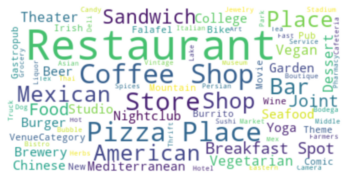

<Figure size 7200x7200 with 0 Axes>

In [246]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

file = open('/home/prakash/Desktop/venues_category.txt', 'r').read()
az_venues_word = WordCloud(
    background_color='white',
    max_words=3000,
    stopwords=stopwords
)


# generate the word cloud
az_venues_word.generate(file)


plt.imshow(az_venues_word, interpolation='bicubic')
plt.axis('off')


fig = plt.figure()
fig.set_figwidth(100)
fig.set_figheight(100)
plt.show()

In [212]:
ar_venues[ar_venues.VenueCategory == 'Indian Restaurant']

Borough Neighborhood           VenueName      VenueCategory  \
376   Coconino    Flagstaff        India Palace  Indian Restaurant   
435   Coconino    Flagstaff     Himalayan Grill  Indian Restaurant   
611   Maricopa    Guadalupe        Aja Catering  Indian Restaurant   
1202   Yavapai     Prescott           Taj Mahal  Indian Restaurant   
1401  Maricopa   Scottsdale  Jewel of the Crown  Indian Restaurant   

      VenueLatitude  VenueLongitude  
376       35.199582     -111.649693  
435       35.192553     -111.659614  
611       33.370540     -111.963321  
1202      34.542873     -112.470469  
1401      33.492352     -111.922893

In [218]:
ar_venues.VenueCategory.value_counts().sum()

2007

In [283]:
tempe_venues = ar_venues[ar_venues['Neighborhood'] == 'Tempe']
tempe_venues.VenueCategory.unique()

array(['New American Restaurant', 'Mountain', 'Bar',
       'American Restaurant', 'Burger Joint', 'Sandwich Place', 'Park',
       'Liquor Store', 'Thai Restaurant', 'Wine Bar', 'Irish Pub', 'Lake',
       'Pizza Place', 'Coffee Shop', 'Hotel', 'Performing Arts Venue',
       'Seafood Restaurant', 'Fried Chicken Joint', 'Mexican Restaurant',
       'Brewery', 'Fast Food Restaurant', 'Grocery Store',
       'Middle Eastern Restaurant', 'Bistro', 'Breakfast Spot',
       'Comedy Club', 'Sports Bar', 'Convenience Store', 'Zoo',
       'Wine Shop', 'Japanese Restaurant', 'Hot Dog Joint',
       'Greek Restaurant', 'Golf Course', 'Bakery',
       'Health & Beauty Service', 'Shopping Mall', 'Pet Store',
       'Botanical Garden', 'Vegetarian / Vegan Restaurant',
       'Sporting Goods Shop', 'Falafel Restaurant', 'Castle',
       'Steakhouse', 'Restaurant', 'BBQ Joint', 'Scenic Lookout',
       'Farmers Market', 'Cosmetics Shop', 'Trail', 'Salon / Barbershop',
       'Beer Store', 'Cocktail

In [286]:
tempe_venues.VenueCategory.value_counts().sort_index()

American Restaurant              3
BBQ Joint                        1
Bakery                           1
Bar                              3
Baseball Stadium                 1
Beer Store                       1
Bistro                           1
Botanical Garden                 1
Breakfast Spot                   1
Brewery                          5
Bubble Tea Shop                  1
Burger Joint                     1
Castle                           1
Cocktail Bar                     1
Coffee Shop                      9
Comedy Club                      1
Convenience Store                3
Cosmetics Shop                   1
Deli / Bodega                    1
Disc Golf                        1
Falafel Restaurant               1
Farmers Market                   1
Fast Food Restaurant             2
Fried Chicken Joint              1
Frozen Yogurt Shop               1
Golf Course                      1
Greek Restaurant                 1
Grocery Store                    2
Health & Beauty Serv

In [273]:
trail = pd.read_csv('/home/prakash/Downloads/data.csv')
trail = trail.drop(['rank', 'change', 'density'], axis = 1)
trail.columns= ['Neighborhood', 'pop20', 'pop10']

In [274]:
pd.merge(ar, trail, on = ['Neighborhood'], how = 'inner' )

Borough      Neighborhood   Latitude   Longitude    pop20    pop10
0        Pinal   Apache Junction  33.415048 -111.549578    43703    35930
1     Maricopa          Avondale  33.435499 -112.349557    88755    76234
2      Cochise            Benson  31.967861 -110.294517     4823     5126
3      Cochise            Bisbee  31.448155 -109.928408     5155     5614
4     Maricopa           Buckeye  33.370275 -112.583867    82186    51355
5       Mohave     Bullhead City  35.147777 -114.568298    40945    39549
6      Yavapai        Camp Verde  34.563636 -111.854318    11271    10871
7     Maricopa          Carefree  33.822261 -111.918203     3968     3370
8        Pinal       Casa Grande  32.879502 -111.757352    60184    48945
9     Maricopa        Cave Creek  33.833333 -111.950833     5922     4816
10    Maricopa          Chandler  33.306222 -111.841332   268675   236479
11     Yavapai      Chino Valley  34.757523 -112.453781    12997    10810
12     Yavapai         Clarkdale  34.771132 -112.057937     4549     4081
13    Greenlee           Clifton  33.050897 -109.296183     3570     3268
14      Mohave     Colorado City  36.990262 -112.975770     4881     4820
15       Pinal          Coolidge  32.977839 -111.517624    13459    11897
16     Yavapai        Cottonwood  34.739489 -112.009794    12471    11192
17     Yavapai        Cottonwood  34.739489 -112.009794      186      226
18     Yavapai    Dewey-Humboldt  34.513845 -112.256011     4168     3895
19     Cochise           Douglas  31.462230 -109.593943    15140    17608
20    Greenlee            Duncan  32.715178 -109.100449      755      689
21      Apache             Eagar  34.111158 -109.291475     4915     4914
22    Maricopa         El Mirage  33.613034 -112.324487    36122    31808
23       Pinal              Eloy  32.755700 -111.555042    23063    16816
24    Coconino         Flagstaff  35.198752 -111.651823    75752    66106
25       Pinal          Florence  33.031451 -111.387343    26955    26780
26    Maricopa    Fountain Hills  33.611711 -111.717361    25377    22513
27    Coconino          Fredonia  36.945542 -112.526589     1276     1331
28    Maricopa         Gila Bend  32.947827 -112.716824     2108     1922
29    Maricopa           Gilbert  33.352763 -111.789037   258935   209435
30    Maricopa          Glendale  33.538686 -112.185994   254500   226168
31        Gila             Globe  33.395951 -110.787177     7390     7531
32    Maricopa          Goodyear  33.435367 -112.357601    87897    65500
33    Maricopa         Guadalupe  33.363125 -111.962533     6979     5529
34        Gila            Hayden  32.998027 -110.780857      633      660
35      Navajo          Holbrook  34.903706 -110.159316     5159     5053
36     Cochise     Huachuca City  31.627870 -110.333968     1718     1861
37     Yavapai            Jerome  34.748911 -112.113772      457      445
38       Pinal            Kearny  33.057009 -110.910666     2221     1956
39      Mohave           Kingman  35.189443 -114.053006    30944    28132
40      Mohave  Lake Havasu City  34.483850 -114.322450    56254    52578
41    Maricopa   Litchfield Park  33.493380 -112.358124     6650     4901
42       Pinal           Mammoth  32.722568 -110.640655     1708     1508
43        Pima            Marana  32.444699 -111.215709    50055    34759
44       Pinal          Maricopa  33.058129 -112.047755    52208    43689
45    Maricopa              Mesa  33.415112 -111.831477   527666   440995
46        Gila             Miami  33.399478 -110.870950     1774     1822
47  Santa Cruz           Nogales  31.340213 -110.936082    20276    20812
48        Pima        Oro Valley  32.390907 -110.966488    46933    41062
49    Coconino              Page  36.914831 -111.457294     7572     7395
50    Maricopa   Paradise Valley  33.542801 -111.955600    14756    12783
51      La Paz            Parker  34.149841 -114.288961     3214     3060
52  Santa Cruz         Patagonia  31.539314 -110.756305      883      913
53        G

In [290]:
tempe_venues

Borough Neighborhood                               VenueName  \
4347  Maricopa        Tempe                         House of Tricks   
4348  Maricopa        Tempe    "A" Mountain (Hayden Butte Preserve)   
4349  Maricopa        Tempe                                The Yard   
4350  Maricopa        Tempe                               Daily Jam   
4351  Maricopa        Tempe                            The Chuckbox   
4352  Maricopa        Tempe                 Ike's Love & Sandwiches   
4353  Maricopa        Tempe                        Tempe Beach Park   
4354  Maricopa        Tempe                            Top's Liquor   
4355  Maricopa        Tempe                              Thai Basil   
4356  Maricopa        Tempe                           Postino Annex   
4357  Maricopa        Tempe      Rúla Búla Irish Pub and Restaurant   
4358  Maricopa        Tempe                         Tempe Town Lake   
4359  Maricopa        Tempe                               Oregano's   
4360  Maricopa        Tempe                        Cornish Pasty Co   
4361  Maricopa        Tempe                       Cartel Coffee Lab   
4362  Maricopa        Tempe                    AC Hotel by Marriott   
4363  Maricopa        Tempe                   Original ChopShop Co.   
4364  Maricopa        Tempe               Tempe Center for the Arts   
4365  Maricopa        Tempe              Casey Moore's Oyster House   
4366  Maricopa        Tempe                      Dutch Bros. Coffee   
4367  Maricopa        Tempe          Raising Cane's Chicken Fingers   
4368  Maricopa        Tempe                        El Pollo Supremo   
4369  Maricopa        Tempe                       The Shop Beer Co.   
4370  Maricopa        Tempe                         In-N-Out Burger   
4371  Maricopa        Tempe                      Pedal Haus Brewery   
4372  Maricopa        Tempe                           Thai Elephant   
4373  Maricopa        Tempe                      Whole Foods Market   
4374  Maricopa        Tempe                       Tempe Papago Park   
4375  Maricopa        Tempe                         Shawarma Corner   
4376  Maricopa        Tempe             The Lodge Sasquatch Kitchen   
4377  Maricopa        Tempe                            Press Coffee   
4378  Maricopa        Tempe                     Perfect Pear Bistro   
4379  Maricopa        Tempe              Four Peaks Brewing Company   
4380  Maricopa        Tempe                               Starbucks   
4381  Maricopa        Tempe                  Chipotle Mexican Grill   
4382  Maricopa        Tempe                           Harlow's Café   
4383  Maricopa        Tempe                            Tempe Improv   
4384  Maricopa        Tempe                            Press Coffee   
4385  Maricopa        Tempe          Devil's Advocate Bar and Grill   
4386  Maricopa        Tempe                               Haji-Baba   
4387  Maricopa        Tempe                                QuikTrip   
4388  Maricopa        Tempe                             Sub Factory   
4389  Maricopa        Tempe         Arizona Sandwich Co. & Catering   
4390  Maricopa        Tempe                             Phoenix Zoo   
4391  Maricopa        Tempe                   Infusion Coffee & Tea   
4392  Maricopa        Tempe                       Total Wine & More   
4393  Maricopa        Tempe                      Dutch Bros. Coffee   
4394  Maricopa        Tempe              Kabuki Japanese Restaurant   
4395  Maricopa        Tempe                      Jersey Mike's Subs   
4396  Maricopa        Tempe                              Portillo's   
4397  Maricopa        Tempe                   George's Famous Gyros   
4398  Maricopa        Tempe               Rolling Hills Golf Course   
4399  Maricopa        Tempe                      Venezia's Pizzeria   
4400  Maricopa        Tempe                        Hole in the Rock   
4401  Maricopa        Tempe      La Bocca Urban Pizzeria + Wine Bar   
4402  Maricopa        Tempe    

In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

# create map of the venues that we have using latitude and longitudes
venues_map = folium.Map(location=[VenueLatitude, VenueLongitude], zoom_start=15) # generate map centred around Jersey city


# add Jersey City as a red circle mark
folium.features.CircleMarker(
    [lat_newJercy, long_newJercy],
    radius=10,
    popup='Jersey city',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)

In [292]:
# add all the venuew of the Jersey city to the map as blue circle markers
for lat, lng, label in zip(tempe_venues['VenueLatitude'], tempe_venues['VenueLongitude'], tempe_venues['VenueName']):
    label=folium.Popup(label,parse_html=True)
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.6,
        parse_html = False).add_to(venues_map)
venues_map


AttributeError: module 'folium.features' has no attribute 'CircleMarker'

In [294]:
# one hot encoding
tempe_onehot = pd.get_dummies(tempe_venues[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
tempe_onehot['Neighborhood'] = tempe_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [tempe_onehot.columns[-1]] + list(tempe_onehot.columns[:-1])
tempe_onehot = tempe_onehot[fixed_columns]

tempe_onehot.head()


Neighborhood  American Restaurant  BBQ Joint  Bakery  Bar  \
4347        Tempe                    0          0       0    0   
4348        Tempe                    0          0       0    0   
4349        Tempe                    0          0       0    1   
4350        Tempe                    1          0       0    0   
4351        Tempe                    0          0       0    0   

      Baseball Stadium  Beer Store  Bistro  Botanical Garden  Breakfast Spot  \
4347                 0           0       0                 0               0   
4348                 0           0       0                 0               0   
4349                 0           0       0                 0               0   
4350                 0           0       0                 0               0   
4351                 0           0       0                 0               0   

      Brewery  Bubble Tea Shop  Burger Joint  Castle  Cocktail Bar  \
4347        0                0             0       0             0   
4348        0                0             0       0             0   
4349        0                0             0       0             0   
4350        0                0             0       0             0   
4351        0                0             1       0             0   

      Coffee Shop  Comedy Club  Convenience Store  Cosmetics Shop  \
4347            0            0                  0               0   
4348            0            0                  0               0   
4349            0            0                  0               0   
4350            0            0                  0               0   
4351            0            0                  0               0   

      Deli / Bodega  Disc Golf  Falafel Restaurant  Farmers Market  \
4347              0          0                   0               0   
4348              0          0                   0               0   
4349              0          0                   0               0   
4350              0          0                   0               0   
4351              0          0                   0               0   

      Fast Food Restaurant  Fried Chicken Joint  Frozen Yogurt Shop  \
4347                     0                    0                   0   
4348                     0                    0                   0   
4349                     0                    0                   0   
4350                     0                    0                   0   
4351                     0                    0                   0   

      Golf Course  Greek Restaurant  Grocery Store  Health & Beauty Service  \
4347            0                 0              0                        0   
4348            0                 0              0                        0   
4349            0                 0              0                        0   
4350            0                 0              0                        0   
4351            0                 0              0                        0   

      Hot Dog Joint  Hotel  Irish Pub  Japanese Restaurant  Lake  \
4347              0      0          0                    0     0   
4348              0      0          0                    0     0   
4349              0      0          0                    0     0   
4350              0      0          0                    0     0   
4351              0      0          0                    0     0   

      Liquor Store  Mexican Restaurant  Middle Eastern Restaurant  Mountain  \
4347             0                   0                          0         0   
4348             0                   0                          0         1   
4349             0                   0                          0         0   
4350             0                   0                          0         0   
4351             0                   0                          0         0   

      Music Venue  New American Restaurant  Park  Performing Arts Venue  \
4347     

In [295]:
tempe_onehot.shape

(100, 62)

In [296]:
tempe_grouped = tempe_onehot.groupby('Neighborhood').mean().reset_index()
tempe_grouped


Neighborhood  American Restaurant  BBQ Joint  Bakery   Bar  \
0        Tempe                 0.03       0.01    0.01  0.03   

   Baseball Stadium  Beer Store  Bistro  Botanical Garden  Breakfast Spot  \
0              0.01        0.01    0.01              0.01            0.01   

   Brewery  Bubble Tea Shop  Burger Joint  Castle  Cocktail Bar  Coffee Shop  \
0     0.05             0.01          0.01    0.01          0.01         0.09   

   Comedy Club  Convenience Store  Cosmetics Shop  Deli / Bodega  Disc Golf  \
0         0.01               0.03            0.01           0.01       0.01   

   Falafel Restaurant  Farmers Market  Fast Food Restaurant  \
0                0.01            0.01                  0.02   

   Fried Chicken Joint  Frozen Yogurt Shop  Golf Course  Greek Restaurant  \
0                 0.01                0.01         0.01              0.01   

   Grocery Store  Health & Beauty Service  Hot Dog Joint  Hotel  Irish Pub  \
0           0.02                     0.01           0.02   0.02       0.01   

   Japanese Restaurant  Lake  Liquor Store  Mexican Restaurant  \
0                 0.01  0.01          0.01                0.04   

   Middle Eastern Restaurant  Mountain  Music Venue  New American Restaurant  \
0                       0.03      0.02         0.01                     0.01   

   Park  Performing Arts Venue  Pet Store  Pizza Place  Record Shop  \
0  0.04                   0.01       0.01         0.04         0.01   

   Restaurant  Salon / Barbershop  Sandwich Place  Scenic Lookout  \
0        0.01                0.01            0.04            0.01   

   Seafood Restaurant  Shopping Mall  Sporting Goods Shop  Sports Bar  \
0                0.02           0.01                 0.01        0.01   

   Steakhouse  Thai Restaurant  Toy / Game Store  Trail  \
0        0.01             0.02              0.01   0.01   

   Vegetarian / Vegan Restaurant  Wine Bar  Wine Shop   Zoo  
0                           0.01      0.01       0.01  0.01

In [297]:
num_top_venues = 5

for hood in tempe_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = tempe_grouped[tempe_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Tempe----
            venue  freq
0     Coffee Shop  0.09
1         Brewery  0.05
2  Sandwich Place  0.04
3     Pizza Place  0.04
4            Park  0.04




In [299]:
# one hot encoding
ar_onehot = pd.get_dummies(ar_venues[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ar_onehot['Neighborhood'] = ar_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ar_onehot.columns[-1]] + list(ar_onehot.columns[:-1])
ar_onehot = ar_onehot[fixed_columns]

ar_grouped = ar_onehot.groupby('Neighborhood').mean().reset_index()
ar_grouped


Neighborhood       Zoo       ATM  Adult Boutique  Advertising Agency  \
0    Apache Junction  0.000000  0.000000            0.00                0.00   
1           Avondale  0.000000  0.000000            0.00                0.00   
2             Benson  0.000000  0.000000            0.00                0.00   
3             Bisbee  0.000000  0.000000            0.00                0.00   
4            Buckeye  0.000000  0.018519            0.00                0.00   
5      Bullhead City  0.000000  0.000000            0.00                0.00   
6         Camp Verde  0.000000  0.000000            0.00                0.00   
7           Carefree  0.000000  0.000000            0.00                0.00   
8        Casa Grande  0.000000  0.000000            0.00                0.00   
9         Cave Creek  0.000000  0.000000            0.00                0.00   
10          Chandler  0.000000  0.000000            0.00                0.00   
11      Chino Valley  0.000000  0.000000            0.00                0.00   
12         Clarkdale  0.000000  0.000000            0.00                0.00   
13           Clifton  0.000000  0.000000            0.00                0.00   
14     Colorado City  0.000000  0.000000            0.00                0.00   
15          Coolidge  0.000000  0.000000            0.00                0.00   
16        Cottonwood  0.000000  0.000000            0.00                0.00   
17    Dewey-Humboldt  0.000000  0.000000            0.00                0.00   
18           Douglas  0.000000  0.000000            0.00                0.00   
19            Duncan  0.000000  0.000000            0.00                0.00   
20             Eagar  0.000000  0.000000            0.00                0.00   
21         El Mirage  0.000000  0.000000            0.00                0.00   
22              Eloy  0.000000  0.000000            0.00                0.00   
23         Flagstaff  0.000000  0.000000            0.00                0.00   
24          Florence  0.000000  0.000000            0.00                0.00   
25    Fountain Hills  0.000000  0.000000            0.00                0.00   
26          Fredonia  0.000000  0.000000            0.00                0.00   
27         Gila Bend  0.000000  0.000000            0.00                0.00   
28           Gilbert  0.000000  0.000000            0.00                0.00   
29          Glendale  0.000000  0.000000            0.00                0.00   
30             Globe  0.000000  0.000000            0.00                0.00   
31          Goodyear  0.000000  0.000000            0.00                0.00   
32         Guadalupe  0.000000  0.000000            0.00                0.00   
33            Hayden  0.000000  0.000000            0.00                0.00   
34          Holbrook  0.000000  0.000000            0.00                0.00   
35     Huachuca City  0.000000  0.000000            0.00                0.00   
36            Jerome  0.000000  0.000000            0.00                0.00   
37            Kearny  0.000000  0.000000            0.00                0.00   
38           Kingman  0.000000  0.024390            0.00                0.00   
39  Lake Havasu City  0.000000  0.000000            0.00                0.00   
40   Litchfield Park  0.000000  0.000000            0.00                0.00   
41           Mammoth  0.000000  0.000000            0.00                0.00   
42            Marana  0.000000  0.000000            0.00                0.00   
43          Maricopa  0.000000  0.000000            0.00                0.00   
44              Mesa  0.000000  0.000000            0.00                0.00   
45             Miami  0.000000  0.000000            0.00                0.00   
46           Nogales  0.000000  0.000000            0.00                0.00   
47        Oro Valley  0.000000  0.000000            0.00                0.00   
48              Page  0.000000  0.000000            0.00                0.00   
49   Par

In [300]:
num_top_venues = 5

for hood in ar_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = ar_grouped[ar_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Apache Junction----
                  venue  freq
0                 Trail  0.09
1  Fast Food Restaurant  0.08
2        Sandwich Place  0.06
3         Grocery Store  0.05
4              Pharmacy  0.05


----Avondale----
                  venue  freq
0           Coffee Shop  0.07
1    Mexican Restaurant  0.05
2   American Restaurant  0.05
3                   Gym  0.05
4  Fast Food Restaurant  0.05


----Benson----
                 venue  freq
0                Hotel  0.09
1         Intersection  0.09
2  Fried Chicken Joint  0.06
3       Sandwich Place  0.06
4    Convenience Store  0.06


----Bisbee----
                 venue  freq
0                Hotel  0.12
1        Deli / Bodega  0.06
2   Mexican Restaurant  0.06
3  American Restaurant  0.06
4          Pizza Place  0.06


----Buckeye----
                  venue  freq
0           Pizza Place  0.11
1  Fast Food Restaurant  0.11
2           Gas Station  0.09
3    Mexican Restaurant  0.07
4        Discount Store  0.06


----Bullhead Ci

In [301]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [302]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = ar_grouped['Neighborhood']

for ind in np.arange(ar_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ar_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0  Apache Junction                 Trail  Fast Food Restaurant   
1         Avondale           Coffee Shop  Fast Food Restaurant   
2           Benson          Intersection                 Hotel   
3           Bisbee                 Hotel           Pizza Place   
4          Buckeye           Pizza Place  Fast Food Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Sandwich Place              Pharmacy           Pizza Place   
1                   Gym   American Restaurant    Mexican Restaurant   
2  Fast Food Restaurant   Fried Chicken Joint        Sandwich Place   
3                   Bar   American Restaurant         Deli / Bodega   
4           Gas Station    Mexican Restaurant           Coffee Shop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0         Grocery Store        Breakfast Spot    Mexican Restaurant   
1          Burger Joint           Pizza Place      Sushi Restaurant   
2     Convenience Store    Mexican Restaurant        Breakfast Spot   
3           Coffee Shop    Mexican Restaurant                  Café   
4        Discount Store          Intersection           Wings Joint   

  9th Most Common Venue 10th Most Common Venue  
0   American Restaurant      Convenience Store  
1    Frozen Yogurt Shop     Seafood Restaurant  
2                 Motel       Business Service  
3         Grocery Store     Italian Restaurant  
4        Sandwich Place               Pharmacy

In [303]:
ar_grouped_clustering = ar_grouped.drop('Neighborhood',1)

In [304]:
sum_of_squared_distances = []
K = range(1,20)
for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k).fit(ar_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

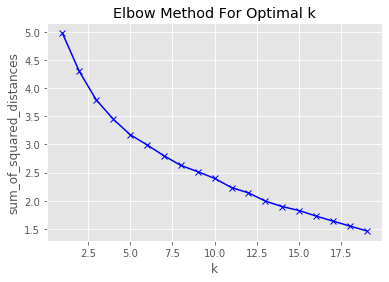

In [305]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k');


In [306]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,20)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(ar_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(ar_grouped_clustering, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

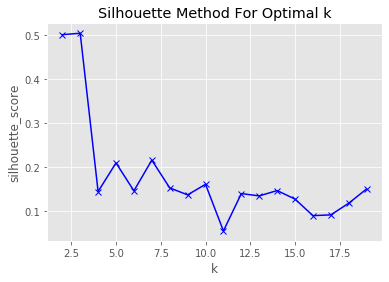

In [307]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

In [308]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 6

ar_grouped_clustering = ar_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ar_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([4, 4, 0, 5, 0, 4, 0, 4, 4, 4], dtype=int32)

In [315]:
ar_merged = ar

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
ar_merged = ar_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

ar_merged.head() # check the last columns!

Borough     Neighborhood   Latitude   Longitude  Cluster Labels  \
91     Pinal  Apache Junction  33.415048 -111.549578               4   
92  Maricopa         Avondale  33.435499 -112.349557               4   
93   Cochise           Benson  31.967861 -110.294517               0   
94   Cochise           Bisbee  31.448155 -109.928408               5   
95  Maricopa          Buckeye  33.370275 -112.583867               0   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
91                 Trail  Fast Food Restaurant        Sandwich Place   
92           Coffee Shop  Fast Food Restaurant                   Gym   
93          Intersection                 Hotel  Fast Food Restaurant   
94                 Hotel           Pizza Place                   Bar   
95           Pizza Place  Fast Food Restaurant           Gas Station   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
91              Pharmacy           Pizza Place         Grocery Store   
92   American Restaurant    Mexican Restaurant          Burger Joint   
93   Fried Chicken Joint        Sandwich Place     Convenience Store   
94   American Restaurant         Deli / Bodega           Coffee Shop   
95    Mexican Restaurant           Coffee Shop        Discount Store   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
91        Breakfast Spot    Mexican Restaurant   American Restaurant   
92           Pizza Place      Sushi Restaurant    Frozen Yogurt Shop   
93    Mexican Restaurant        Breakfast Spot                 Motel   
94    Mexican Restaurant                  Café         Grocery Store   
95          Intersection           Wings Joint        Sandwich Place   

   10th Most Common Venue  
91      Convenience Store  
92     Seafood Restaurant  
93       Business Service  
94     Italian Restaurant  
95               Pharmacy

In [316]:
ar_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 91 to 181
Data columns (total 15 columns):
Borough                   91 non-null object
Neighborhood              91 non-null object
Latitude                  91 non-null float64
Longitude                 91 non-null float64
Cluster Labels            91 non-null int32
1st Most Common Venue     91 non-null object
2nd Most Common Venue     91 non-null object
3rd Most Common Venue     91 non-null object
4th Most Common Venue     91 non-null object
5th Most Common Venue     91 non-null object
6th Most Common Venue     91 non-null object
7th Most Common Venue     91 non-null object
8th Most Common Venue     91 non-null object
9th Most Common Venue     91 non-null object
10th Most Common Venue    91 non-null object
dtypes: float64(2), int32(1), object(12)
memory usage: 11.0+ KB


In [317]:
ar_merged.dropna(inplace = True)
ar_merged.shape

(91, 15)

In [343]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=6)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ar_merged['Latitude'], ar_merged['Longitude'], ar_merged['Neighborhood'], ar_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

In [326]:
from IPython.display import display

In [328]:
display(ar_merged[ar_merged['Cluster Labels'] == 0].shape)
ar_merged[ar_merged['Cluster Labels'] == 0]

(29, 15)

Borough      Neighborhood   Latitude   Longitude  Cluster Labels  \
93    Cochise            Benson  31.967861 -110.294517               0   
95   Maricopa           Buckeye  33.370275 -112.583867               0   
97    Yavapai        Camp Verde  34.563636 -111.854318               0   
102   Yavapai      Chino Valley  34.757523 -112.453781               0   
106     Pinal          Coolidge  32.977839 -111.517624               0   
110  Greenlee            Duncan  32.715178 -109.100449               0   
111    Apache             Eagar  34.111158 -109.291475               0   
113     Pinal              Eloy  32.755700 -111.555042               0   
115     Pinal          Florence  33.031451 -111.387343               0   
118  Maricopa         Gila Bend  32.947827 -112.716824               0   
121      Gila             Globe  33.395951 -110.787177               0   
125    Navajo          Holbrook  34.903706 -110.159316               0   
126   Cochise     Huachuca City  31.627870 -110.333968               0   
133      Pima            Marana  32.444699 -111.215709               0   
136      Gila             Miami  33.399478 -110.870950               0   
147    Navajo  Pinetop-Lakeside  34.142544 -109.960384               0   
150    La Paz        Quartzsite  33.663914 -114.229949               0   
152    Graham           Safford  32.833955 -109.707580               0   
154      Yuma          San Luis  32.493440 -114.773755               0   
157    Navajo          Show Low  34.254208 -110.029833               0   
159    Navajo         Snowflake  34.511470 -110.079609               0   
160      Yuma          Somerton  32.596440 -114.709677               0   
162    Apache     Springerville  34.134060 -109.286008               0   
165     Pinal          Superior  33.293945 -111.096231               0   
167    Navajo            Taylor  34.464734 -110.091655               0   
169    Graham          Thatcher  32.849232 -109.759248               0   
175  Maricopa        Wickenburg  33.968096 -112.730135               0   
176   Cochise           Willcox  32.252914 -109.831576               0   
179    Navajo           Winslow  35.024187 -110.697357               0   

    1st Most Common Venue 2nd Most Common Venue       3rd Most Common Venue  \
93           Intersection                 Hotel        Fast Food Restaurant   
95            Pizza Place  Fast Food Restaurant                 Gas Station   
97     Mexican Restaurant  Fast Food Restaurant                     RV Park   
102           Pizza Place  Fast Food Restaurant                 Gas Station   
106        Discount Store     Convenience Store        Fast Food Restaurant   
110    Mexican Restaurant        Discount Store  Tourist Information Center   
111     Convenience Store    Mexican Restaurant               Grocery Store   
113  Fast Food Restaurant           Gas Station           Convenience Store   
115    Mexican Restaurant  Fast Food Restaurant                         Bar   
118  Fast Food Restaurant                 Hotel          Mexican Restaurant   
121     Convenience Store    Mexican Restaurant         American Restaurant   
125                 Hotel    Mexican Restaurant        Fast Food Restaurant   
126        Discount Store        Sandwich Place                 Gas Station   
133                  Park          Intersection                 Pizza Place   
136     Convenience Store    Mexican Restaurant                 Coffee Shop   
147  Fast Food Restaurant        Discount Store           Convenience Store   
150        Sandwich Place  Fast Food Restaurant                       Diner   
152  Fast Food Restaurant    Mexican Restaurant                 Pizza Place   
154     Convenience Store    Mexican Restaurant                 Pizza Place   
157  Fast Food Restaurant    Mexican Restaurant                 Pizza Place   
159  Fast Food Restaurant        Discount Store           Convenience Store   
160                Bakery        Discount Store

In [327]:
display(ar_merged[ar_merged['Cluster Labels'] == 1].shape)
ar_merged[ar_merged['Cluster Labels'] == 1]

(1, 15)

Borough Neighborhood   Latitude   Longitude  Cluster Labels  \
146  Graham         Pima  32.896175 -109.827581               1   

    1st Most Common Venue       2nd Most Common Venue 3rd Most Common Venue  \
146        Ice Cream Shop  Construction & Landscaping                  Park   

    4th Most Common Venue        5th Most Common Venue 6th Most Common Venue  \
146                  Farm  Eastern European Restaurant     Electronics Store   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
146           Event Space           Fabric Shop               Factory   

    10th Most Common Venue  
146     Falafel Restaurant

In [329]:
display(ar_merged[ar_merged['Cluster Labels'] == 2].shape)
ar_merged[ar_merged['Cluster Labels'] == 2]

(3, 15)

Borough Neighborhood   Latitude   Longitude  Cluster Labels  \
124    Gila       Hayden  32.998027 -110.780857               2   
132   Pinal      Mammoth  32.722568 -110.640655               2   
178    Gila    Winkelman  32.987566 -110.770939               2   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
124    Mexican Restaurant     Convenience Store           Gas Station   
132    Mexican Restaurant        Discount Store     Convenience Store   
178    Mexican Restaurant     Convenience Store           Gas Station   

    4th Most Common Venue 5th Most Common Venue        6th Most Common Venue  \
124            Campground         Women's Store           Falafel Restaurant   
132         Women's Store                  Farm  Eastern European Restaurant   
178            Campground         Women's Store           Falafel Restaurant   

           7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
124  Eastern European Restaurant     Electronics Store           Event Space   
132            Electronics Store           Event Space           Fabric Shop   
178  Eastern European Restaurant     Electronics Store           Event Space   

    10th Most Common Venue  
124            Fabric Shop  
132                Factory  
178            Fabric Shop

In [331]:
display(ar_merged[ar_merged['Cluster Labels'] == 3].shape)
ar_merged[ar_merged['Cluster Labels'] == 3]

(1, 15)

Borough Neighborhood  Latitude   Longitude  Cluster Labels  \
109  Cochise      Douglas  31.46223 -109.593943               3   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
109               Airport            Restaurant         Women's Store   

    4th Most Common Venue 5th Most Common Venue        6th Most Common Venue  \
109    Falafel Restaurant            Donut Shop  Eastern European Restaurant   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
109     Electronics Store           Event Space           Fabric Shop   

    10th Most Common Venue  
109                Factory

In [332]:
display(ar_merged[ar_merged['Cluster Labels'] == 4].shape)
ar_merged[ar_merged['Cluster Labels'] == 4]

(43, 15)

Borough      Neighborhood   Latitude   Longitude  Cluster Labels  \
91        Pinal   Apache Junction  33.415048 -111.549578               4   
92     Maricopa          Avondale  33.435499 -112.349557               4   
96       Mohave     Bullhead City  35.147777 -114.568298               4   
98     Maricopa          Carefree  33.822261 -111.918203               4   
99        Pinal       Casa Grande  32.879502 -111.757352               4   
100    Maricopa        Cave Creek  33.833333 -111.950833               4   
101    Maricopa          Chandler  33.306222 -111.841332               4   
103     Yavapai         Clarkdale  34.771132 -112.057937               4   
104    Greenlee           Clifton  33.050897 -109.296183               4   
107     Yavapai        Cottonwood  34.739489 -112.009794               4   
112    Maricopa         El Mirage  33.613034 -112.324487               4   
114    Coconino         Flagstaff  35.198752 -111.651823               4   
116    Maricopa    Fountain Hills  33.611711 -111.717361               4   
119    Maricopa           Gilbert  33.352763 -111.789037               4   
120    Maricopa          Glendale  33.538686 -112.185994               4   
122    Maricopa          Goodyear  33.435367 -112.357601               4   
123    Maricopa         Guadalupe  33.363125 -111.962533               4   
129      Mohave           Kingman  35.189443 -114.053006               4   
130      Mohave  Lake Havasu City  34.483850 -114.322450               4   
131    Maricopa   Litchfield Park  33.493380 -112.358124               4   
134       Pinal          Maricopa  33.058129 -112.047755               4   
135    Maricopa              Mesa  33.415112 -111.831477               4   
137  Santa Cruz           Nogales  31.340213 -110.936082               4   
138        Pima        Oro Valley  32.390907 -110.966488               4   
140    Maricopa   Paradise Valley  33.542801 -111.955600               4   
141      La Paz            Parker  34.149841 -114.288961               4   
143        Gila            Payson  34.230868 -111.325136               4   
144    Maricopa            Peoria  33.580612 -112.237294               4   
145    Maricopa           Phoenix  33.448437 -112.074142               4   
148     Yavapai          Prescott  34.539996 -112.468762               4   
149     Yavapai   Prescott Valley  34.610024 -112.315721               4   
151    Maricopa       Queen Creek  33.248386 -111.634158               4   
153        Pima         Sahuarita  31.957582 -110.955646               4   
155    Maricopa        Scottsdale  33.494219 -111.926018               4   
158     Cochise      Sierra Vista  31.545571 -110.277225               4   
161        Pima      South Tucson  32.199495 -110.968344               4   
164        Gila       Star Valley  34.261223 -111.238362               4   
166    Maricopa          Surprise  33.629227 -112.368019               4   
168    Maricopa             Tempe  33.425506 -111.940012               4   
170    Maricopa          Tolleson  33.450050 -112.259309               4   
172        Pima            Tucson  32.222876 -110.974848               4   
180    Maricopa         Youngtown  33.593730 -112.303326               4   
181        Yuma              Yuma  32.692659 -114.627616               4   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
91                  Trail  Fast Food Restaurant        Sandwich Place   
92            Coffee Shop  Fast Food Restaurant                   Gym   
96     Mexican Restaurant  Fast Food Restaurant            Steakhouse   
98            Coffee Shop           Golf Course   American Restaurant   
99   Fast Food Restaurant     Convenience Store                  Café   
100           Coffee Shop   American Restaurant           Golf Course   
101           Coffee Shop    Mexican Restaurant           Pizza Place   
103           Pizza Place    Mexican Restaurant   American Restaurant   
104   

In [333]:
display(ar_merged[ar_merged['Cluster Labels'] == 5].shape)
ar_merged[ar_merged['Cluster Labels'] == 5]

(14, 15)

Borough    Neighborhood   Latitude   Longitude  Cluster Labels  \
94      Cochise          Bisbee  31.448155 -109.928408               5   
105      Mohave   Colorado City  36.990262 -112.975770               5   
108     Yavapai  Dewey-Humboldt  34.513845 -112.256011               5   
117    Coconino        Fredonia  36.945542 -112.526589               5   
127     Yavapai          Jerome  34.748911 -112.113772               5   
128       Pinal          Kearny  33.057009 -110.910666               5   
139    Coconino            Page  36.914831 -111.457294               5   
142  Santa Cruz       Patagonia  31.539314 -110.756305               5   
156     Yavapai          Sedona  34.850566 -111.830235               5   
163      Apache       St. Johns  34.505870 -109.360933               5   
171     Cochise       Tombstone  31.712868 -110.067576               5   
173    Coconino         Tusayan  35.973595 -112.126557               5   
174        Yuma         Wellton  32.672831 -114.146889               5   
177    Coconino        Williams  35.250339 -112.186948               5   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
94                  Hotel           Pizza Place                   Bar   
105       Border Crossing               Airport        Shipping Store   
108    Mexican Restaurant          Antique Shop            Steakhouse   
117       Border Crossing          Home Service        Discount Store   
127   American Restaurant              Wine Bar    Mexican Restaurant   
128        Discount Store           Pizza Place    Mexican Restaurant   
139                 Hotel  Fast Food Restaurant        Scenic Lookout   
142       Nature Preserve         Grocery Store   American Restaurant   
156                 Trail                 Hotel        Scenic Lookout   
163        Discount Store     Convenience Store          Carpet Store   
171   American Restaurant                   Bar        History Museum   
173                 Hotel   American Restaurant              Heliport   
174        Sandwich Place           Pizza Place                 Hotel   
177                 Hotel   American Restaurant                 Motel   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
94    American Restaurant         Deli / Bodega           Coffee Shop   
105                 Hotel                Market          Home Service   
108                  Farm      Business Service           Gas Station   
117               Airport                  Food   American Restaurant   
127                 Hotel                Winery        Scenic Lookout   
128        Shipping Store   American Restaurant         Grocery Store   
139           Pizza Place           Gas Station   American Restaurant   
142           Pizza Place                Bakery       Bed & Breakfast   
156                Resort    Mexican Restaurant    Italian Restaurant   
163   American Restaurant                 Hotel        Sandwich Place   
171                 Motel                 Hotel        Discount Store   
173            Campground         National Park         Tour Provider   
174     Convenience Store           Golf Course                 Canal   
177                 Diner         Grocery Store    Mexican Restaurant   

          7th Most Common Venue        8th Most Common Venue  \
94           Mexican Restaurant                         Café   
105                     Brewery                         Farm   
108                 Golf Course               Discount Store   
117                Liquor Store               Farmers Market   
127          Italian Restaurant                  Coffee Shop   
128          Falafel Restaurant  Eastern European Restaurant   
139               Tour Provider               Discount Store   
142                       Hotel                  Coffee Shop   
156         American Restaurant      New American Restaurant   
163                 Flea Market                  Flower Shop   
1

In [347]:
ar_venues[ar_venues['VenueCategory'] == 'Asian Restaurant']

Borough      Neighborhood                           VenueName  \
140   Maricopa          Avondale                   Eest Asian Bistro   
176   Maricopa          Avondale                          Tokyo Joes   
483   Maricopa          Carefree                    Z's Asian Fusion   
646   Maricopa        Cave Creek                    Z's Asian Fusion   
1156  Maricopa         El Mirage                 T & J Asian Cuisine   
1365  Maricopa    Fountain Hills                                 Hao   
1391  Maricopa    Fountain Hills                             Pei Wei   
1537  Maricopa           Gilbert                             Pei Wei   
1587  Maricopa          Glendale                    Ono Hawaiian BBQ   
1617  Maricopa          Glendale                   Halo-Halo Kitchen   
1767  Maricopa          Goodyear                   Eest Asian Bistro   
1803  Maricopa          Goodyear                          Tokyo Joes   
1878  Maricopa         Guadalupe                        Ahipoki Bowl   
2054    Mohave           Kingman                Bangkok Thai Cuisine   
2160    Mohave  Lake Havasu City                   The Flame Broiler   
2209  Maricopa   Litchfield Park                   Eest Asian Bistro   
2461  Maricopa              Mesa                      Dragon Express   
2673      Pima        Oro Valley  Cheng's Beijing Chinese Restaurant   
2703      Pima        Oro Valley                             Pei Wei   
2778  Coconino              Page                       Asian Cuisine   
2857  Maricopa   Paradise Valley                             Pei Wei   
2905    La Paz            Parker                        China Garden   
3015  Maricopa            Peoria                    Ono Hawaiian BBQ   
3181  Maricopa           Phoenix                      The Clever Koi   
3502  Maricopa       Queen Creek                             Pei Wei   
3503  Maricopa       Queen Creek                           Iron Chef   
3612      Pima         Sahuarita                Asian Sky Restaurant   
4017   Cochise      Sierra Vista          Hibachi Grill Super Buffet   
4507  Maricopa          Tolleson                          Tokyo Joes   
4547  Maricopa          Tolleson                 Wong's Chinese Food   
4920  Maricopa         Youngtown                 T & J Asian Cuisine   
5104      Yuma              Yuma         Asian Star Oriental Cuisine   

         VenueCategory  VenueLatitude  VenueLongitude  
140   Asian Restaurant      33.481014     -112.339322  
176   Asian Restaurant      33.464188     -112.280901  
483   Asian Restaurant      33.833447     -111.939270  
646   Asian Restaurant      33.833447     -111.939270  
1156  Asian Restaurant      33.564704     -112.287770  
1365  Asian Restaurant      33.594678     -111.712801  
1391  Asian Restaurant      33.579034     -111.761300  
1537  Asian Restaurant      33.381103     -111.756704  
1587  Asian Restaurant      33.582017     -112.205992  
1617  Asian Restaurant      33.566851     -112.135912  
1767  Asian Restaurant      33.481014     -112.339322  
1803  Asian Restaurant      33.464188     -112.280901  
1878  Asian Restaurant      33.316267     -111.968759  
2054  Asian Restaurant      35.189491     -114.059745  
2160  Asian Restaurant      34.477043     -114.321273  
2209  Asian Restaurant      33.481014     -112.339322  
2461  Asian Restaurant      33.378355     -111.858211  
2673  Asian Restaurant      32.347433     -110.976443  
2703  Asian Restaurant      32.336666     -110.978942  
2778  Asian Restaurant      36.916937     -111.457340  
2857  Asian Restaurant      33.564954     -111.924412  
2905  Asian Restaurant      34.150670     -114.287925  
3015  Asian Restaurant      33.582017     -112.205992  
3181  Asian Restaurant      33.497444     -112.074131  
3502  Asian Restaurant      33.257278     -111.637986  
3503  Asian Restaurant      33.233481     -111.687184  
3612  Asian Restaurant      31.959830     -110.983867  
4017  Asian Restaurant      31.559490     -110.255786  
4507  